In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# def get_avg_flow_and_samples(filename):
#     df = pd.read_csv(filename, skiprows=14, usecols=['Relative Time[s]', 'Flow [ul/min]']) 
#     avg_flow = df["Flow [ul/min]"].mean()
#     num_samples_count = df.shape[0]
#     return avg_flow, num_samples_count

In [3]:

def get_avg_flow_and_samples(filename):
    df = pd.read_csv(filename, skiprows=14, usecols=['Relative Time[s]', 'Flow [ul/min]']) 
    avg_flow = df["Flow [ul/min]"].mean() - 0.01683716564992958
    num_samples_count = df.shape[0]
    return avg_flow, num_samples_count


kPa_s07_2x15 = ["n40", "n30", "n20", "n10",  "0", '10', "20", "30", "40",'50', '60', '70']
avg_flows = []
num_samples = []


for i in kPa_s07_2x15:
    filename = f"s07_2x15/s07_2x15_2cm_{i}kPa_trial1_R.csv"
    avg_flow, num_samples_count = get_avg_flow_and_samples(filename)
    avg_flows.append(avg_flow)
    num_samples.append(num_samples_count)

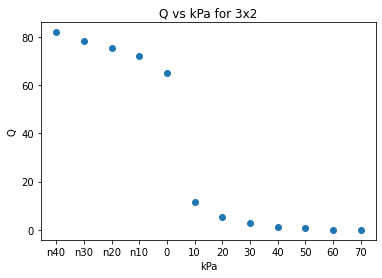

In [4]:
plt.scatter(kPa_s07_2x15, avg_flows)

plt.title('Q vs kPa for 3x2')
plt.xlabel('kPa')
plt.ylabel('Q')
plt.show()

In [5]:
pgh = 1000 * 9.81 * 2E-2 /133 #mmHg

R_tot = [pgh / i for i in avg_flows] #mmHg/(ul/min)

Rtube = 0.014240827419038489

R_s07_2x15 = [i - Rtube  for i in R_tot] #mmHg/(ul/min)
R_s07_2x15 =[ abs(i) for i in R_s07_2x15 ]

R_s07_2x15 


[0.0037823341132796028,
 0.004614387786561109,
 0.005369057043940036,
 0.006264867890828571,
 0.008418843498806158,
 0.11128062091351529,
 0.25109034981900613,
 0.5340634022740591,
 1.0475385262303472,
 2.3168775867025797,
 12.503081188600044,
 68.90713712567171]

In [6]:
# Convert the 'kPa' list elements to numerical values
kPa_s07_2x15 = [-int(i[1:]) if i[0] == 'n' else int(i) for i in kPa_s07_2x15]

kPa_s07_2x15

[-40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70]

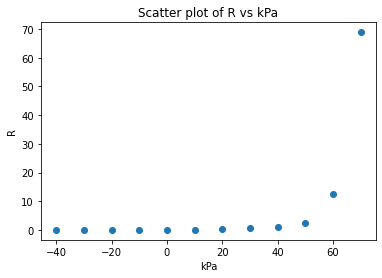

In [7]:

plt.scatter(kPa_s07_2x15, R_s07_2x15)

plt.title('Scatter plot of R vs kPa')
plt.xlabel('kPa')
plt.ylabel('R')
plt.show()


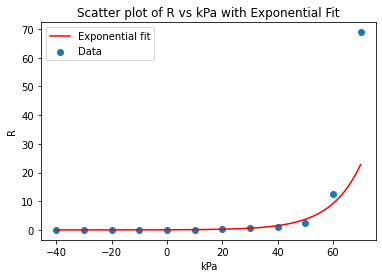

In [8]:

# Convert to numpy arrays
kPa_np = np.array(kPa_s07_2x15)
R_np = np.array(R_s07_2x15)

# Apply a natural logarithmic transformation to R
R_log = np.log(R_np)

# Use polyfit to fit a 1-degree polynomial to kPa and log(R)
coeffs = np.polyfit(kPa_np, R_log, 1)

# Generate a sequence of x values spanning the range of kPa
x_vals = np.linspace(min(kPa_np), max(kPa_np), 1000)

# Calculate the corresponding y values for the best fit line
y_vals = np.exp(coeffs[1]) * np.exp(coeffs[0] * x_vals)

# Plot the data
plt.scatter(kPa_np, R_np, label='Data')
plt.plot(x_vals, y_vals, color='red', label='Exponential fit')

plt.title('Scatter plot of R vs kPa with Exponential Fit')
plt.xlabel('kPa')
plt.ylabel('R')
plt.legend()
plt.show()
